In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns


# importing requiring library to fetch data from mysql

In [2]:
! pip install pandas mysql-connector-python SQLAlchemy


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import mysql.connector

In [4]:
conn = mysql.connector.connect(
    host='localhost',       # e.g., 'localhost' or '127.0.0.1'
    user='root',   # e.g., 'root'
    password='root', # your database password
    database='e_master_card' # name of the database
)

In [5]:
## retrieving data from mysql

df_cust = pd.read_sql("select * From customers",conn)

C:\Users\MANISHA\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [6]:
df_cust

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563,Married
4,5,Advait Malik,Male,48,City,Consultant,39406,Married
...,...,...,...,...,...,...,...,...
995,996,Manya Vasudeva,Female,26,City,Freelancer,0,Married
996,997,Aarav Dhawan,Male,55,City,Business Owner,290061,Single
997,998,Rehan Jha,Male,29,City,Fullstack Developer,139141,Married
998,999,Amara Rathore,Female,47,City,Business Owner,0,Married


In [7]:
df_trans = pd.read_sql("select * from transactions",conn)

C:\Users\MANISHA\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [8]:
df_trans

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking
...,...,...,...,...,...,...,...
499995,499996,791,2023-09-05,43,Amazon,Books,Phonepe
499996,499997,569,2023-09-05,53022,Meesho,Fashion & Apparel,Net Banking
499997,499998,57,2023-09-05,224,None,Garden & Outdoor,Phonepe
499998,499999,629,2023-09-05,538,Flipkart,Home Decor,Gpay


In [9]:
df_credit_profile = pd.read_sql("select * from credit_profiles",conn)
df_credit_profile

C:\Users\MANISHA\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0
...,...,...,...,...,...,...
999,996,564,0.702963,688.0,2.0,1250.0
1000,997,774,0.465462,17139.0,0.0,60000.0
1001,998,529,0.585856,386.0,3.0,1000.0
1002,999,725,0.249670,6973.0,2.0,40000.0


In [10]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,132439.799000
std,288.819436,15.666155,113706.313793
min,1.000000,1.000000,0.000000
25%,250.750000,26.000000,42229.750000
50%,500.500000,32.000000,107275.000000
75%,750.250000,46.000000,189687.500000
max,1000.000000,135.000000,449346.000000


# checking null values

In [11]:
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [14]:
df_cust[df_cust.annual_income.isna()]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


## There is no null values in this dataset

In [23]:
df_cust[df_cust.annual_income==0].shape

(50, 8)

# there is no null value but having 0 income also indicates that it may be null value

In [26]:
occupation_wise_median= df_cust.groupby("occupation")["annual_income"].median()
occupation_wise_median

occupation
Accountant              65265.0
Artist                  44915.0
Business Owner         254881.0
Consultant              51175.0
Data Scientist         127889.0
Freelancer              45189.5
Fullstack Developer     74457.0
Name: annual_income, dtype: float64

## defining function to replace 0 values with occupation wise_median

In [30]:
def replace_zero_with_occupation_median(row, occupation_median):
    if row['annual_income'] == 0:
        return occupation_median[row['occupation']]
    return row['annual_income']


In [31]:
# Apply the function to the DataFrame
df_cust['annual_income'] = df_cust.apply(replace_zero_with_occupation_median, axis=1, occupation_median=occupation_wise_median)


In [33]:
df_cust[df_cust.annual_income==0]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


# all o values replace with median values

In [35]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138634.437500
std,288.819436,15.666155,110961.396638
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


# histogram  

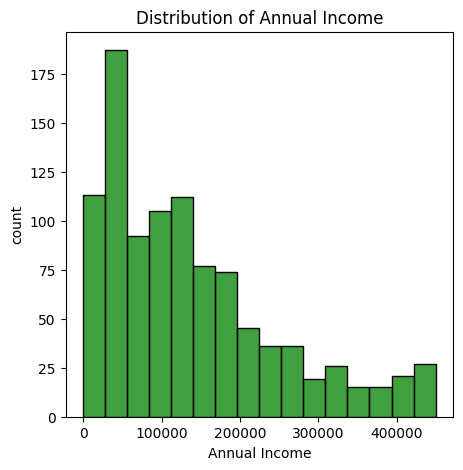

In [43]:
plt.figure(figsize=(5, 5))
sns.histplot(df_cust['annual_income'], kde=False, color='green',label='Data')

# Add titles and labels
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('count')

# Show the plot
plt.show()

# checking outliers

In [44]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138634.437500
std,288.819436,15.666155,110961.396638
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


In [45]:
## setting thershold for annual_income
df_cust[df_cust.annual_income<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


In [46]:
occupation_wise_median

occupation
Accountant              65265.0
Artist                  44915.0
Business Owner         254881.0
Consultant              51175.0
Data Scientist         127889.0
Freelancer              45189.5
Fullstack Developer     74457.0
Name: annual_income, dtype: float64

In [48]:
for index, row in df_cust.iterrows():
    if row['annual_income']<100:
        df_cust.at[index,"annual_income"] = occupation_wise_median[row["occupation"]]

In [51]:
df_cust.iloc[[686,333]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,254881.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,127889.0,Married


# Visualisation

In [52]:
occupation_wise_mean =  df_cust.groupby("occupation")["annual_income"].mean()
occupation_wise_mean

occupation
Accountant              64123.562500
Artist                  45239.842105
Business Owner         268119.833910
Consultant              59927.257732
Data Scientist         136208.603261
Freelancer              76293.089912
Fullstack Developer     78618.385135
Name: annual_income, dtype: float64

In [53]:
occupation_wise_mean.index

Index(['Accountant', 'Artist', 'Business Owner', 'Consultant',
       'Data Scientist', 'Freelancer', 'Fullstack Developer'],
      dtype='object', name='occupation')

In [54]:
occupation_wise_mean.values

array([ 64123.5625    ,  45239.84210526, 268119.83391003,  59927.25773196,
       136208.60326087,  76293.08991228,  78618.38513514])

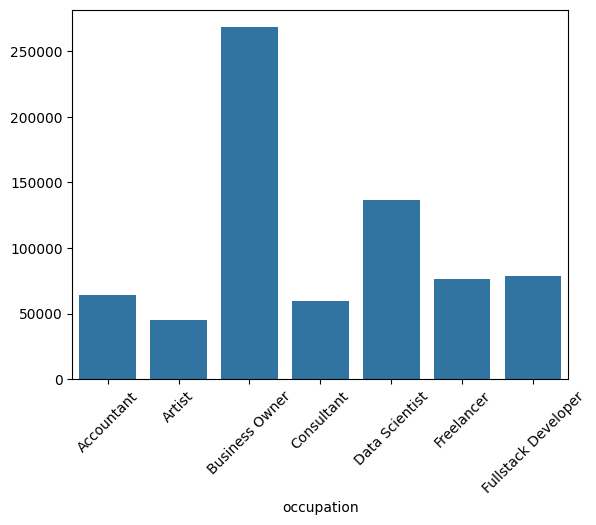

In [56]:
sns.barplot(x=occupation_wise_mean.index,y=occupation_wise_mean.values)
plt.xticks(rotation=45)
plt.show()

C:\Users\MANISHA\AppData\Local\Temp\ipykernel_12952\1791457919.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occupation_wise_mean.index,y=occupation_wise_mean.values,palette="tab10")


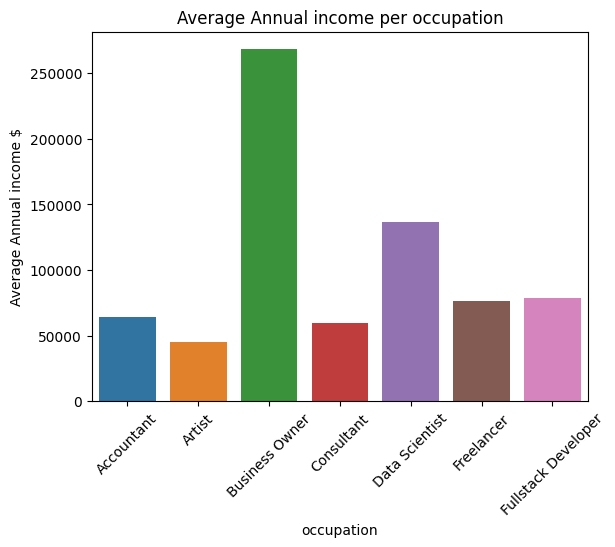

In [57]:
sns.barplot(x=occupation_wise_mean.index,y=occupation_wise_mean.values,palette="tab10")
plt.xticks(rotation=45)
plt.title("Average Annual income per occupation")
plt.xlabel("occupation")
plt.ylabel("Average Annual income $")
plt.show()

# Categorical bar plot

C:\Users\MANISHA\AppData\Local\Temp\ipykernel_12952\2661478491.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_per_group.index,y=avg_income_per_group.values,palette="tab10")


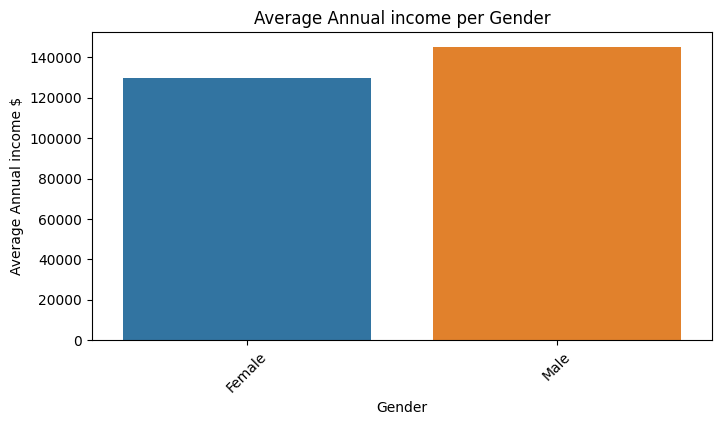

C:\Users\MANISHA\AppData\Local\Temp\ipykernel_12952\2661478491.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_per_group.index,y=avg_income_per_group.values,palette="tab10")


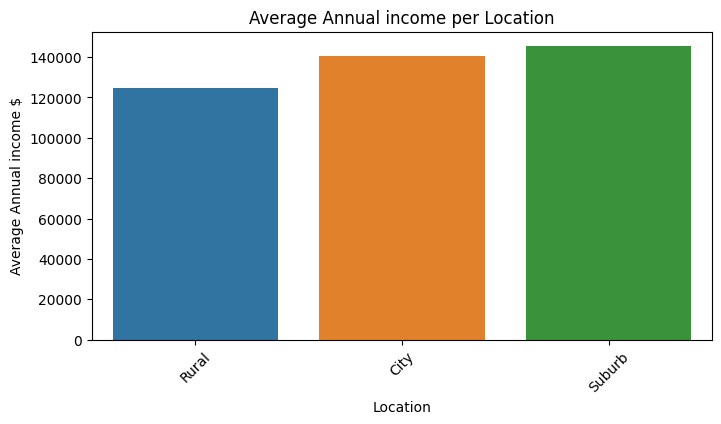

C:\Users\MANISHA\AppData\Local\Temp\ipykernel_12952\2661478491.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_per_group.index,y=avg_income_per_group.values,palette="tab10")


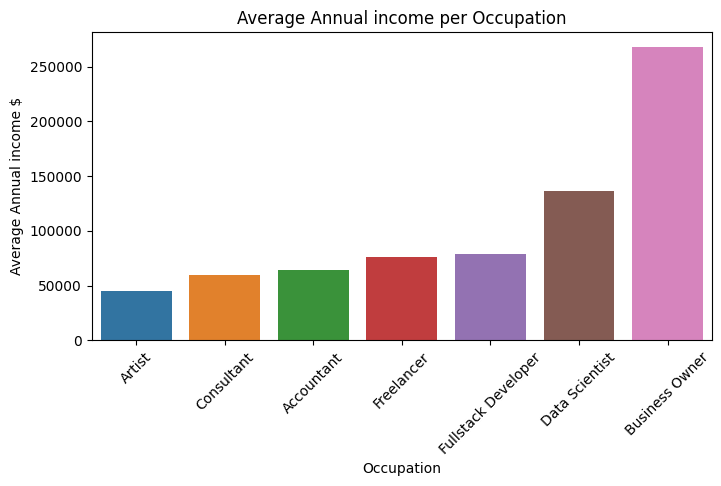

C:\Users\MANISHA\AppData\Local\Temp\ipykernel_12952\2661478491.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_per_group.index,y=avg_income_per_group.values,palette="tab10")


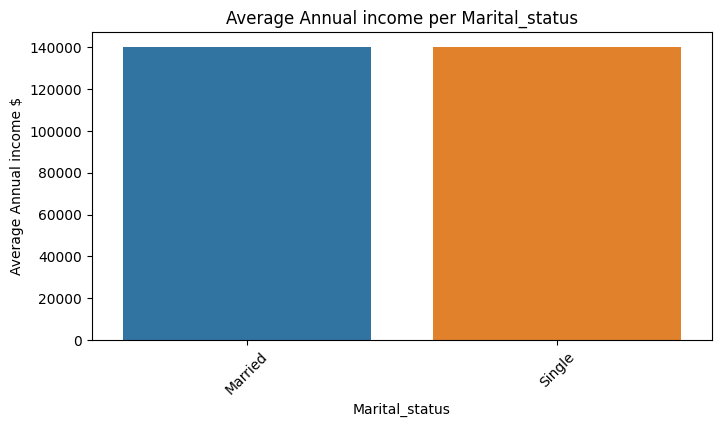

In [63]:
categorical_columns = ['gender','location','occupation','marital_status']

for col in categorical_columns:
    plt.figure(figsize=(8,4))
    avg_income_per_group= df_cust.groupby(col)['annual_income'].mean().sort_values()
    sns.barplot(x=avg_income_per_group.index,y=avg_income_per_group.values,palette="tab10")
    plt.xticks(rotation=45)
    plt.title(f'Average Annual income per {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Average Annual income $')
    plt.show()

C:\Users\MANISHA\AppData\Local\Temp\ipykernel_12952\3730835284.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_per_group.index, y=avg_income_per_group.values, palette="tab10", ax=axs[idx])
C:\Users\MANISHA\AppData\Local\Temp\ipykernel_12952\3730835284.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_per_group.index, y=avg_income_per_group.values, palette="tab10", ax=axs[idx])
C:\Users\MANISHA\AppData\Local\Temp\ipykernel_12952\3730835284.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_per_gro

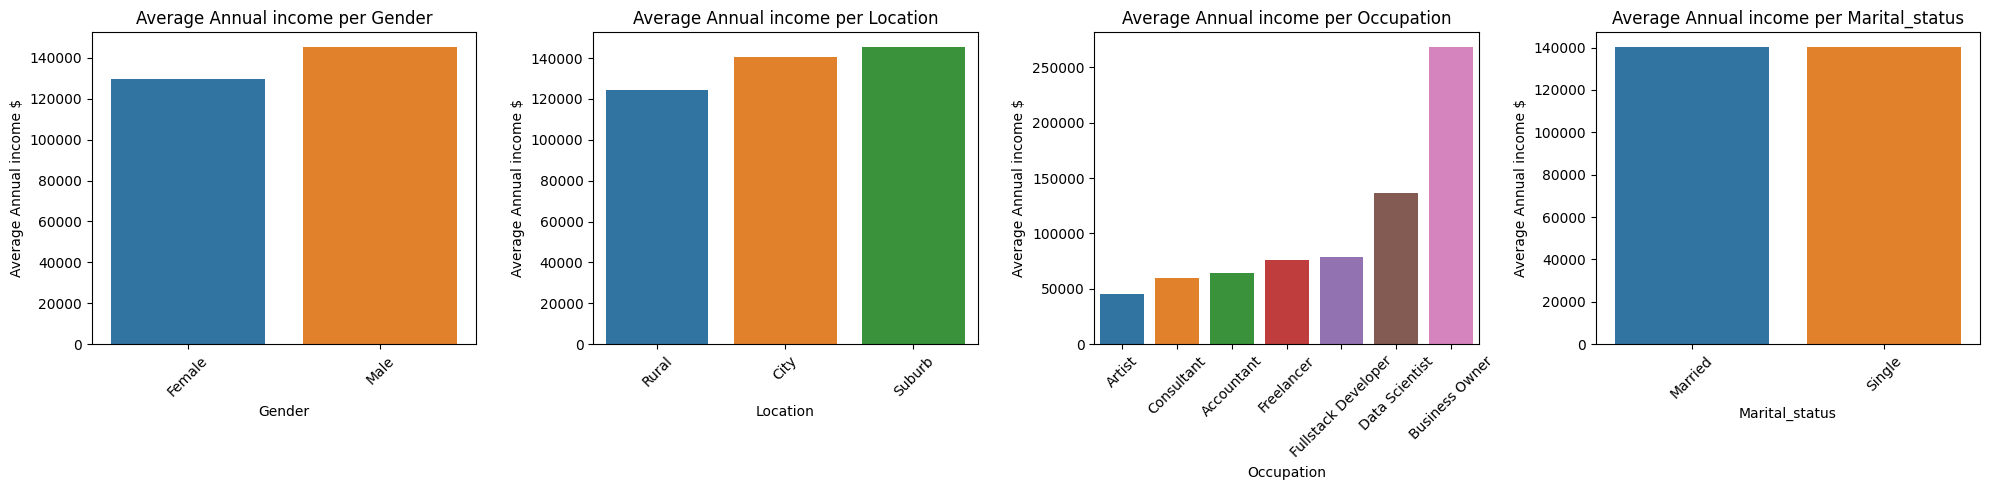

In [64]:
categorical_columns = ['gender', 'location', 'occupation', 'marital_status']

# Create subplots with the appropriate number of rows and columns
fig, axs = plt.subplots(1, len(categorical_columns), figsize=(20, 5))

for idx, col in enumerate(categorical_columns):
    avg_income_per_group = df_cust.groupby(col)['annual_income'].mean().sort_values()
    sns.barplot(x=avg_income_per_group.index, y=avg_income_per_group.values, palette="tab10", ax=axs[idx])
    axs[idx].set_title(f'Average Annual income per {col.capitalize()}')
    axs[idx].set_xlabel(col.capitalize())
    axs[idx].set_ylabel('Average Annual income $')
    axs[idx].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\MANISHA\AppData\Local\Temp\ipykernel_12952\1888416969.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_per_group.index, y=avg_income_per_group.values, palette="tab10", ax=axs[idx])
C:\Users\MANISHA\AppData\Local\Temp\ipykernel_12952\1888416969.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_per_group.index, y=avg_income_per_group.values, palette="tab10", ax=axs[idx])
C:\Users\MANISHA\AppData\Local\Temp\ipykernel_12952\1888416969.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_per_

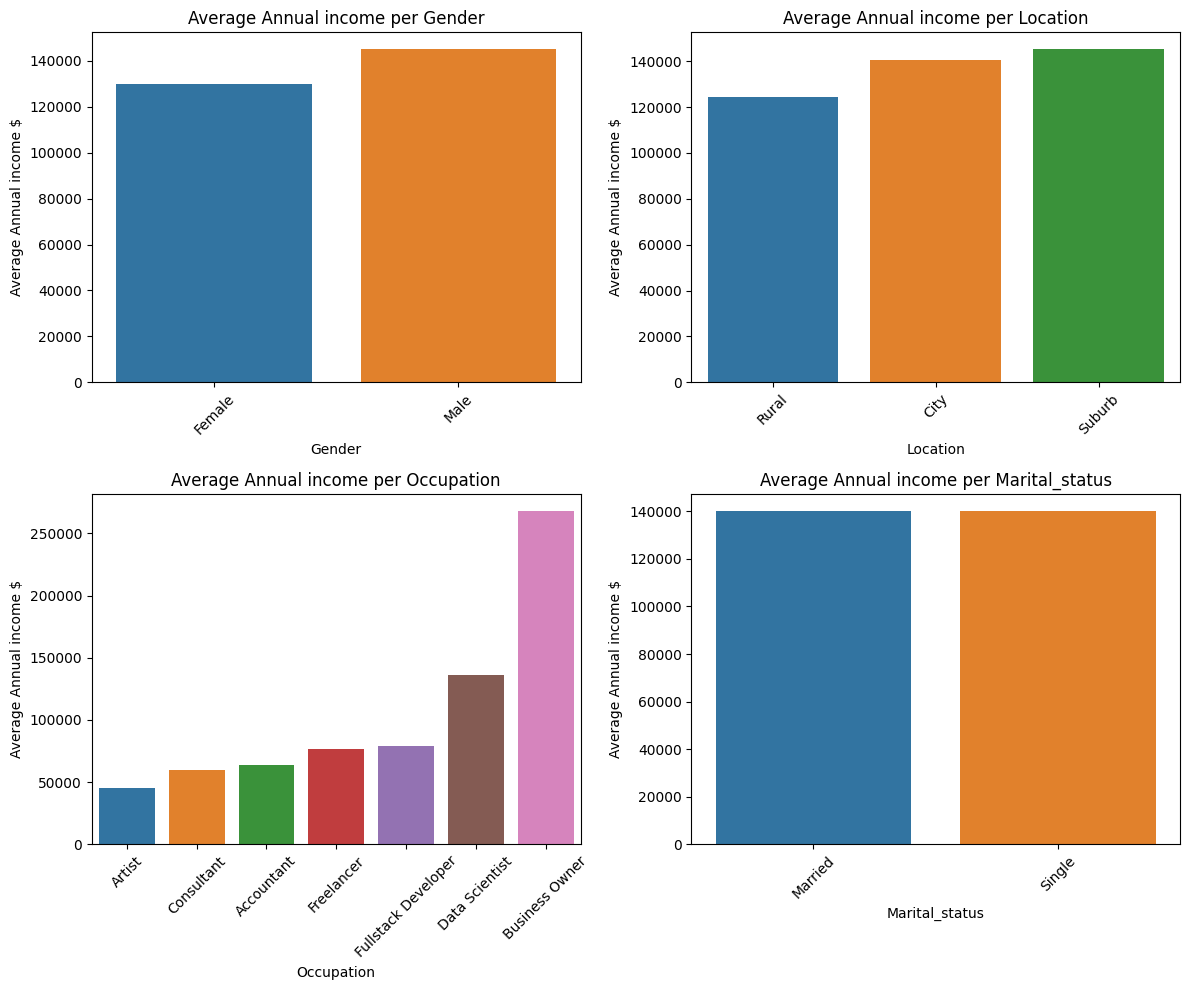

In [65]:
categorical_columns = ['gender', 'location', 'occupation', 'marital_status']

# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axs array for easier iteration
axs = axs.flatten()

for idx, col in enumerate(categorical_columns):
    avg_income_per_group = df_cust.groupby(col)['annual_income'].mean().sort_values()
    sns.barplot(x=avg_income_per_group.index, y=avg_income_per_group.values, palette="tab10", ax=axs[idx])
    axs[idx].set_title(f'Average Annual income per {col.capitalize()}')
    axs[idx].set_xlabel(col.capitalize())
    axs[idx].set_ylabel('Average Annual income $')
    axs[idx].tick_params(axis='x', rotation=45)

# Hide the last subplot if there are more columns than subplots
if len(categorical_columns) > 4:
    axs[-1].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()